# Customer Lifetime Value Prediction for Automobile Insurance


Data Source - https://www.kaggle.com/code/dktalaicha/predict-customer-life-time-value-clv

In [62]:
import zipfile
import os
import pandas as pd
import numpy as np
# Loading the dataset
data = pd.read_csv('dataset.csv')

# Displaying the first few rows of the dataset, its shape and info
data_info = data.info()
data_head = data.head()
data_shape = data.shape

data_head, data_shape, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

(  Customer       State  Customer Lifetime Value Response  Coverage Education  \
 0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
 1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
 2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
 3  WW63253  California              7645.861827       No     Basic  Bachelor   
 4  HB64268  Washington              2813.692575       No     Basic  Bachelor   
 
   Effective To Date EmploymentStatus Gender  Income  ...  \
 0           2/24/11         Employed      F   56274  ...   
 1           1/31/11       Unemployed      F       0  ...   
 2           2/19/11         Employed      F   48767  ...   
 3           1/20/11       Unemployed      M       0  ...   
 4            2/3/11         Employed      M   43836  ...   
 
   Months Since Policy Inception Number of Open Complaints  Number of Policies  \
 0                             5                         0    

In [3]:
# Descriptive statistics of the dataset
descriptive_stats = data.describe(include='all').transpose()

# Displaying the descriptive statistics
descriptive_stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer,9134,9134,BU79786,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9134,5,California,3150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer Lifetime Value,9134.0,NaN,NaN,NaN,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.38119
Response,9134,2,No,7826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coverage,9134,3,Basic,5568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,9134,5,Bachelor,2748,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Effective To Date,9134,59,1/10/11,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,9134,5,Employed,5698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,9134,2,F,4658,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,9134.0,NaN,NaN,NaN,37657.380009,30379.904734,0.0,0.0,33889.5,62320.0,99981.0


**VISUAL EDA**

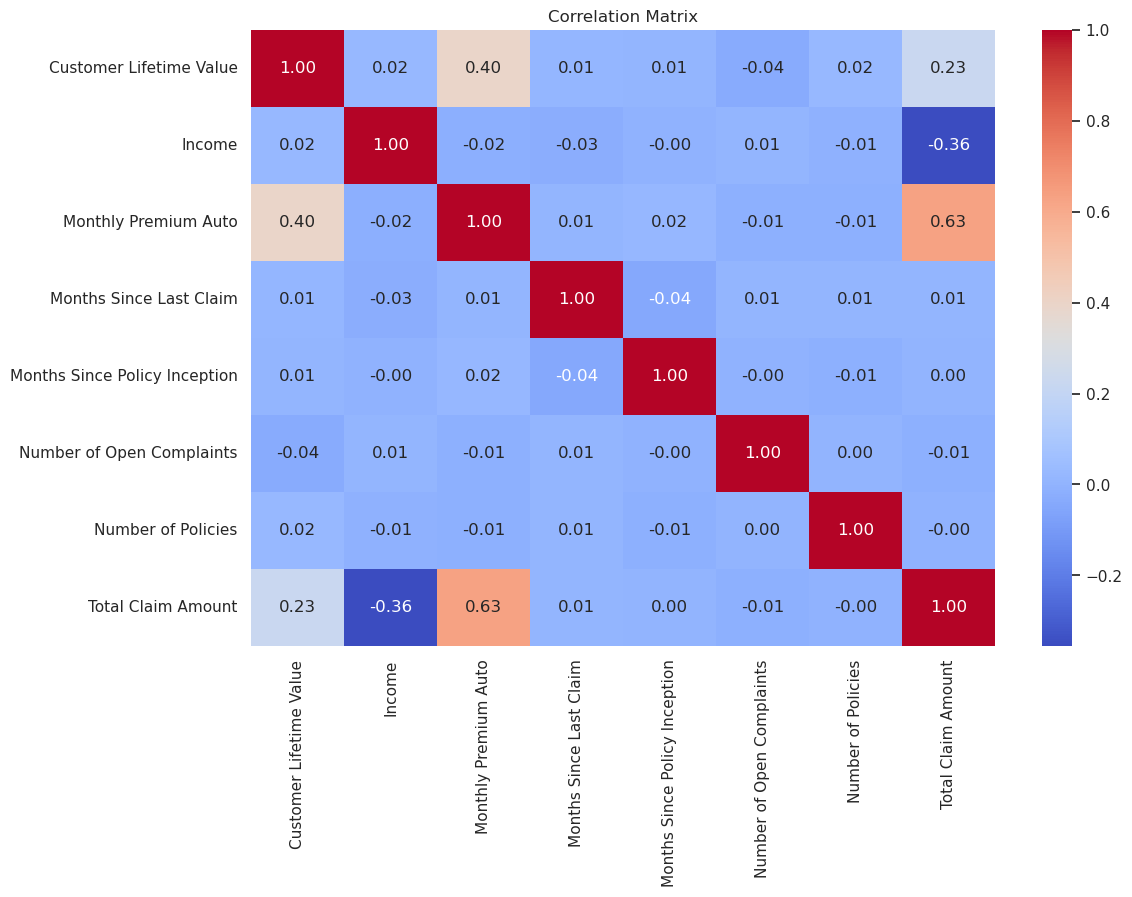

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Calculating the correlation matrix
correlation_matrix = data.select_dtypes(include=['number']).corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

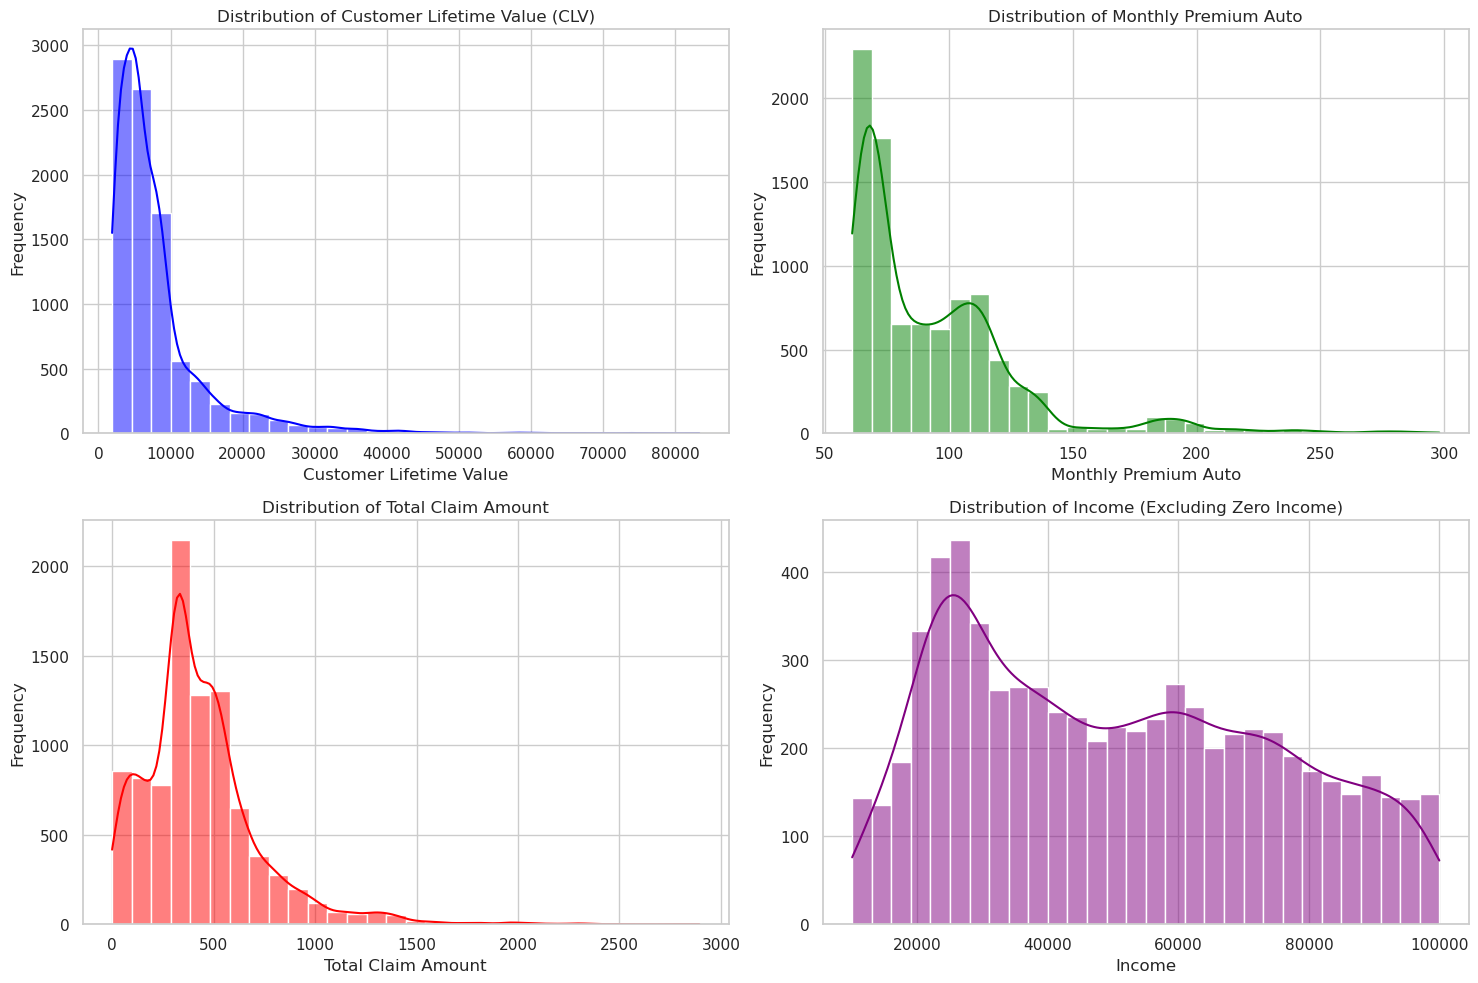

In [5]:
# Setting up the figure for multiple plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Distribution of Customer Lifetime Value (CLV)
sns.histplot(data['Customer Lifetime Value'], bins=30, ax=axes[0, 0], kde=True, color='blue')
axes[0, 0].set_title('Distribution of Customer Lifetime Value (CLV)')
axes[0, 0].set_xlabel('Customer Lifetime Value')
axes[0, 0].set_ylabel('Frequency')

# Distribution of Monthly Premium Auto
sns.histplot(data['Monthly Premium Auto'], bins=30, ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title('Distribution of Monthly Premium Auto')
axes[0, 1].set_xlabel('Monthly Premium Auto')
axes[0, 1].set_ylabel('Frequency')

# Distribution of Total Claim Amount
sns.histplot(data['Total Claim Amount'], bins=30, ax=axes[1, 0], kde=True, color='red')
axes[1, 0].set_title('Distribution of Total Claim Amount')
axes[1, 0].set_xlabel('Total Claim Amount')
axes[1, 0].set_ylabel('Frequency')

# Distribution of Income
sns.histplot(data[data['Income'] > 0]['Income'], bins=30, ax=axes[1, 1], kde=True, color='purple')
axes[1, 1].set_title('Distribution of Income (Excluding Zero Income)')
axes[1, 1].set_xlabel('Income')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

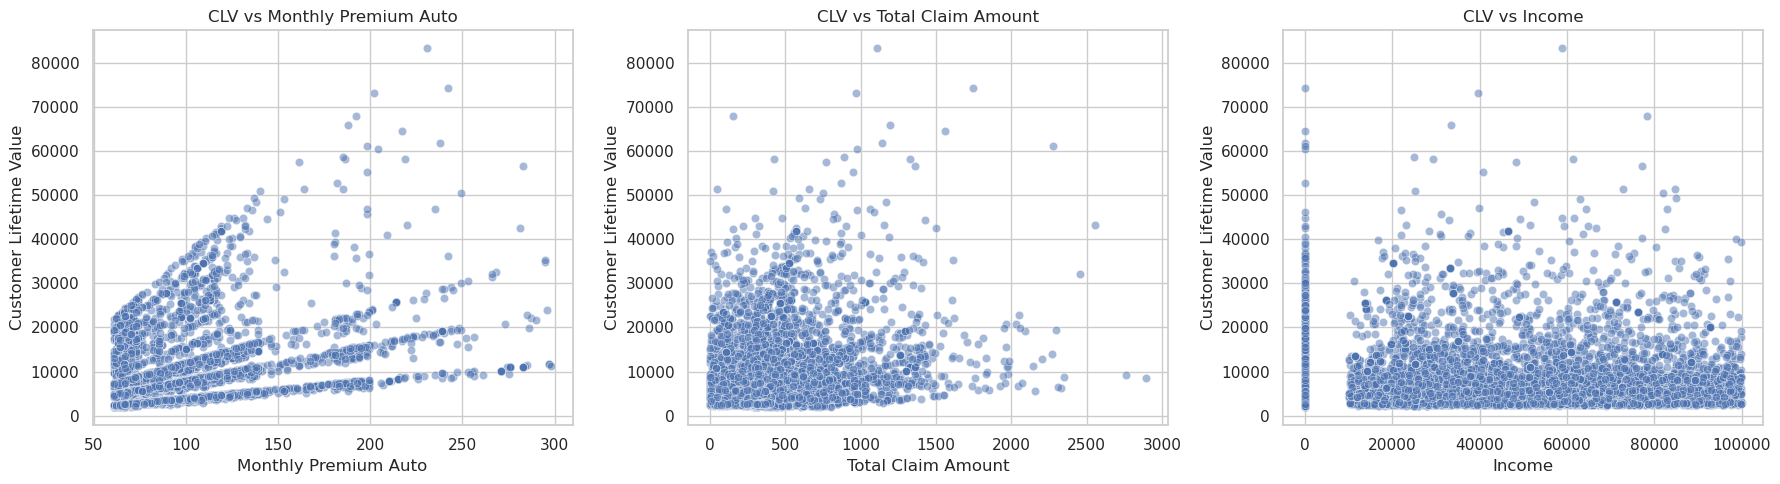

In [6]:
# Setting up the figure for scatter plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Scatter plot of CLV vs Monthly Premium Auto
sns.scatterplot(x='Monthly Premium Auto', y='Customer Lifetime Value', data=data, ax=axes[0], alpha=0.5)
axes[0].set_title('CLV vs Monthly Premium Auto')
axes[0].set_xlabel('Monthly Premium Auto')
axes[0].set_ylabel('Customer Lifetime Value')

# Scatter plot of CLV vs Total Claim Amount
sns.scatterplot(x='Total Claim Amount', y='Customer Lifetime Value', data=data, ax=axes[1], alpha=0.5)
axes[1].set_title('CLV vs Total Claim Amount')
axes[1].set_xlabel('Total Claim Amount')
axes[1].set_ylabel('Customer Lifetime Value')

# Scatter plot of CLV vs Income
sns.scatterplot(x='Income', y='Customer Lifetime Value', data=data, ax=axes[2], alpha=0.5)
axes[2].set_title('CLV vs Income')
axes[2].set_xlabel('Income')
axes[2].set_ylabel('Customer Lifetime Value')

plt.tight_layout()
plt.show()


**Inferential Statistics**

In [7]:
from scipy import stats

In [8]:
# Performing ANOVA tests for each categorical variable
anova_results = {}

categorical_variables = ['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code', 
                         'Marital Status', 'Policy Type', 'Renew Offer Type', 'Sales Channel', 
                         'Vehicle Class', 'Vehicle Size', 'State', 'Policy']

for var in categorical_variables:
    groups = [data['Customer Lifetime Value'][data[var] == category] for category in data[var].unique()]
    F_statistic, p_value = stats.f_oneway(*groups)
    anova_results[var] = {'F-statistic': F_statistic, 'p-value': p_value}

anova_results



{'Coverage': {'F-statistic': 133.67511419504905,
  'p-value': 6.0158970099807e-58},
 'Education': {'F-statistic': 2.422865348052191,
  'p-value': 0.04603615409468821},
 'EmploymentStatus': {'F-statistic': 3.8098087103286047,
  'p-value': 0.00425058662383102},
 'Gender': {'F-statistic': 1.6917849875830426, 'p-value': 0.193398656308463},
 'Location Code': {'F-statistic': 0.10800210605345349,
  'p-value': 0.8976268526407198},
 'Marital Status': {'F-statistic': 3.317664937589137,
  'p-value': 0.036281036735873},
 'Policy Type': {'F-statistic': 2.1836446340486555,
  'p-value': 0.11268909882175004},
 'Renew Offer Type': {'F-statistic': 25.832614444940408,
  'p-value': 1.238399930571374e-16},
 'Sales Channel': {'F-statistic': 0.8805454785276249,
  'p-value': 0.4502779502550758},
 'Vehicle Class': {'F-statistic': 267.1581168024349,
  'p-value': 2.085525760212929e-267},
 'Vehicle Size': {'F-statistic': 2.382494601032998,
  'p-value': 0.09237737701331775},
 'State': {'F-statistic': 0.27289285462

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


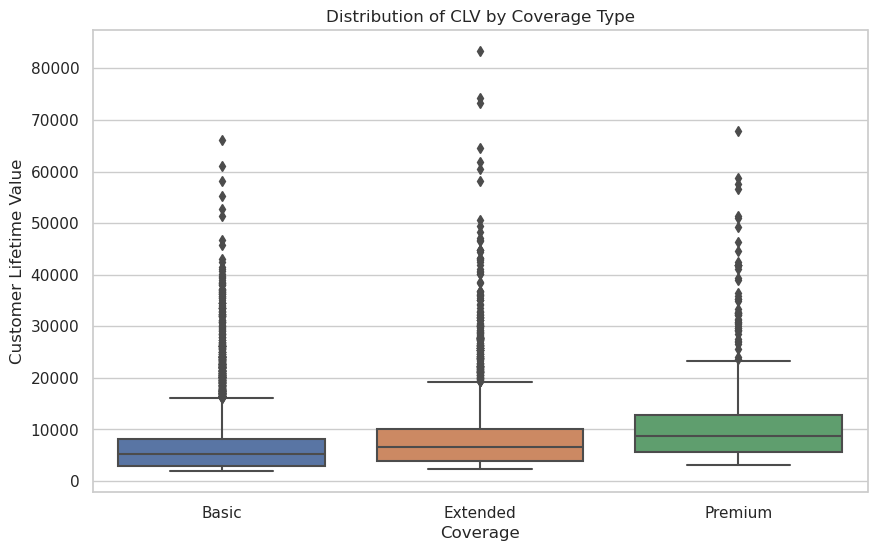

Coverage
Basic        7190.706422
Extended     8789.677608
Premium     10895.603083
Name: Customer Lifetime Value, dtype: float64

In [9]:
# Mean CLV for different coverage types
coverage_mean_clv = data.groupby('Coverage')['Customer Lifetime Value'].mean()

# Plotting the distribution of CLV for different coverage types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Coverage', y='Customer Lifetime Value', data=data)
plt.title('Distribution of CLV by Coverage Type')
plt.show()

coverage_mean_clv



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


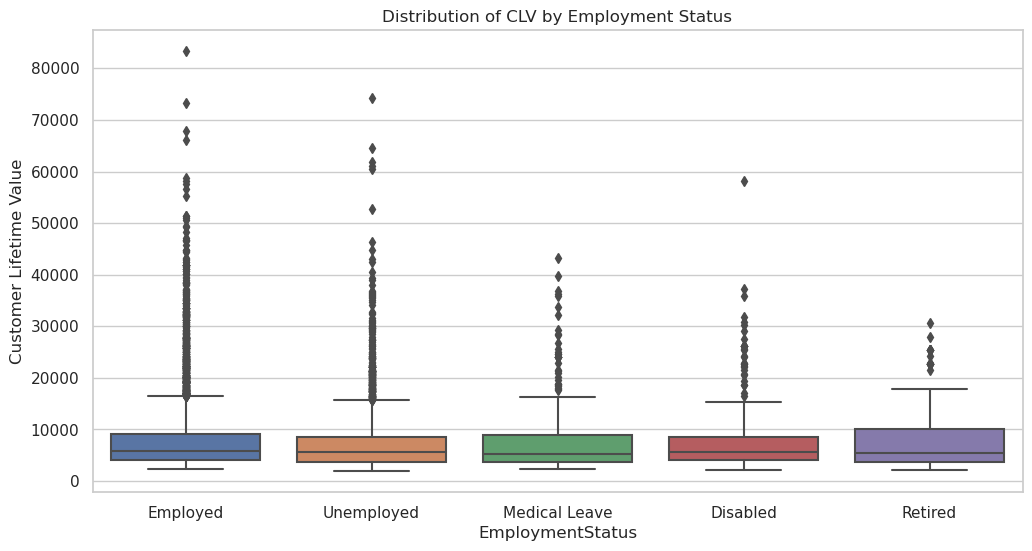

EmploymentStatus
Disabled         7847.889354
Employed         8219.117754
Medical Leave    7641.822437
Retired          7487.865141
Unemployed       7636.319761
Name: Customer Lifetime Value, dtype: float64

In [10]:
# Mean CLV for different employment statuses
employment_status_mean_clv = data.groupby('EmploymentStatus')['Customer Lifetime Value'].mean()

# Plotting the distribution of CLV for different employment statuses
plt.figure(figsize=(12, 6))
sns.boxplot(x='EmploymentStatus', y='Customer Lifetime Value', data=data)
plt.title('Distribution of CLV by Employment Status')
plt.show()

employment_status_mean_clv



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


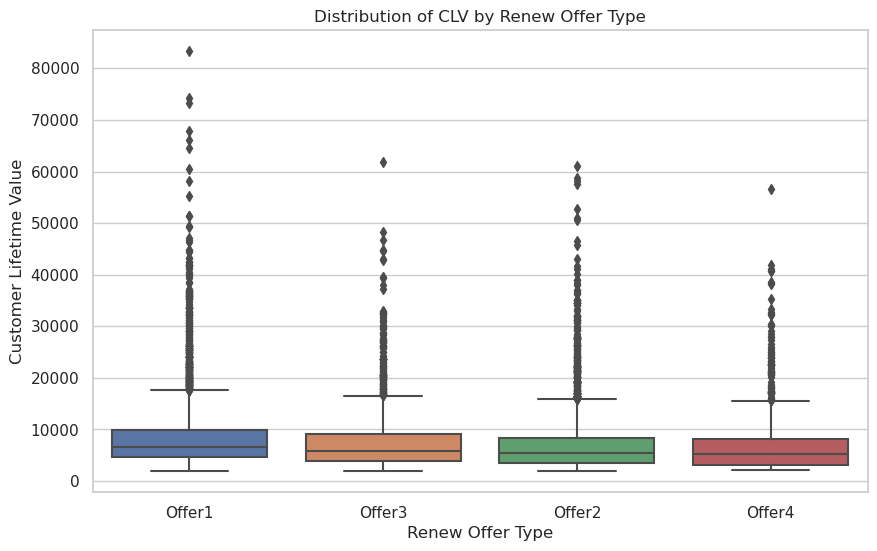

Renew Offer Type
Offer1    8707.085583
Offer2    7396.753826
Offer3    7997.886516
Offer4    7179.947270
Name: Customer Lifetime Value, dtype: float64

In [11]:
# Mean CLV for different renew offer types
renew_offer_type_mean_clv = data.groupby('Renew Offer Type')['Customer Lifetime Value'].mean()

# Plotting the distribution of CLV for different renew offer types
plt.figure(figsize=(10, 6))
sns.boxplot(x='Renew Offer Type', y='Customer Lifetime Value', data=data)
plt.title('Distribution of CLV by Renew Offer Type')
plt.show()

renew_offer_type_mean_clv



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


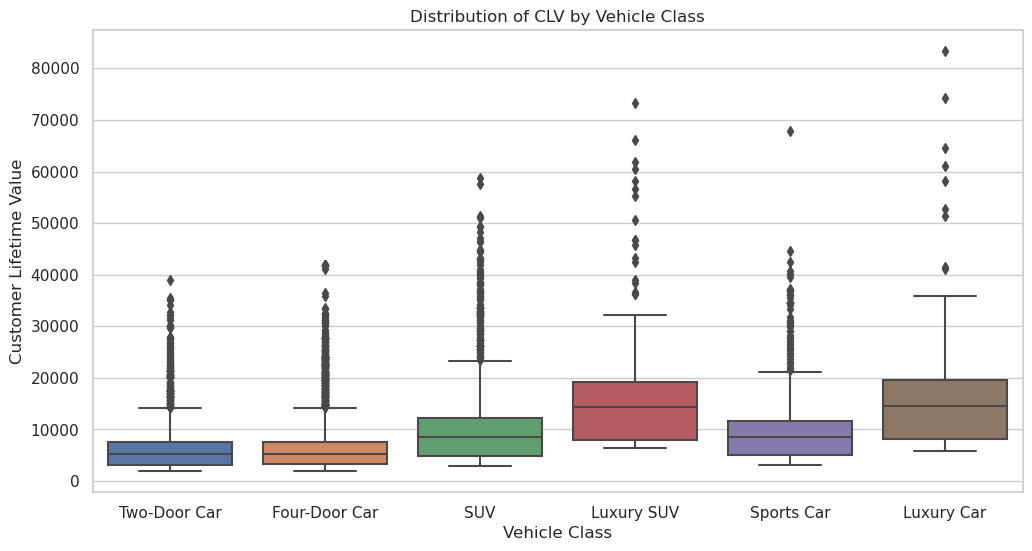

Vehicle Class
Four-Door Car     6631.726607
Luxury Car       17053.348399
Luxury SUV       17122.999134
SUV              10443.511816
Sports Car       10750.989331
Two-Door Car      6671.030732
Name: Customer Lifetime Value, dtype: float64

In [12]:
# Mean CLV for different vehicle classes
vehicle_class_mean_clv = data.groupby('Vehicle Class')['Customer Lifetime Value'].mean()

# Plotting the distribution of CLV for different vehicle classes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Vehicle Class', y='Customer Lifetime Value', data=data)
plt.title('Distribution of CLV by Vehicle Class')
plt.show()

vehicle_class_mean_clv



In [13]:
# One-hot encoding of categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Displaying the first few rows of the encoded data
data_encoded_head = data_encoded.head()
data_encoded_columns = data_encoded.columns

data_encoded_head, data_encoded_columns



(   Customer Lifetime Value  Income  Monthly Premium Auto  \
 0              2763.519279   56274                    69   
 1              6979.535903       0                    94   
 2             12887.431650   48767                   108   
 3              7645.861827       0                   106   
 4              2813.692575   43836                    73   
 
    Months Since Last Claim  Months Since Policy Inception  \
 0                       32                              5   
 1                       13                             42   
 2                       18                             38   
 3                       18                             65   
 4                       12                             44   
 
    Number of Open Complaints  Number of Policies  Total Claim Amount  \
 0                          0                   1          384.811147   
 1                          0                   8         1131.464935   
 2                          0          

In [14]:
# Removing customer ID related features
customer_id_columns = [col for col in data_encoded.columns if col.startswith('Customer_')]
data_encoded = data_encoded.drop(columns=customer_id_columns)
date_cols = [col for col in data_encoded.columns if col.startswith('Effective To Date')]
data_encoded = data_encoded.drop(columns=date_cols)
# Displaying the updated number of columns
updated_column_count = len(data_encoded.columns)
updated_column_count



51

In [15]:
data_encoded

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,False,False,...,False,False,False,False,False,False,False,True,True,False
1,6979.535903,0,94,13,42,0,8,1131.464935,False,False,...,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,0,2,566.472247,False,True,...,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,0,7,529.881344,True,False,...,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,0,1,138.130879,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,True,False,...,False,False,True,False,False,False,False,False,True,False
9130,3096.511217,21604,79,14,28,0,1,379.200000,True,False,...,True,False,False,False,False,False,False,False,True,False
9131,8163.890428,0,85,9,37,3,2,790.784983,True,False,...,True,False,False,False,False,False,False,False,True,False
9132,7524.442436,21941,96,34,3,0,3,691.200000,True,False,...,True,False,False,False,False,False,False,False,False,False


In [16]:
# Creating interaction features between Income and Coverage
for coverage_type in ['Coverage_Extended', 'Coverage_Premium']:
    interaction_feature_name = f'Income_{coverage_type}'
    data_encoded[interaction_feature_name] = data_encoded['Income'] * data_encoded[coverage_type]

# Displaying the first few rows of the updated dataset
data_encoded[['Income', 'Coverage_Extended', 'Coverage_Premium', 'Income_Coverage_Extended', 'Income_Coverage_Premium']].head()



,Income,Coverage_Extended,Coverage_Premium,Income_Coverage_Extended,Income_Coverage_Premium
0,56274,False,False,0,0
1,0,True,False,0,0
2,48767,False,True,0,48767
3,0,False,False,0,0
4,43836,False,False,0,0


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Defining the features (X) and the target variable (y)
X = data_encoded.drop('Customer Lifetime Value', axis=1)
y = data_encoded['Customer Lifetime Value']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fitting a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Getting feature importances
feature_importances = rf.feature_importances_
feature_names = X.columns

# Creating a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the top 20 most important features
top_20_features = feature_importance_df.head(20)
top_20_features



,Feature,Importance
5,Number of Policies,0.466433
1,Monthly Premium Auto,0.253064
2,Months Since Last Claim,0.043022
6,Total Claim Amount,0.037320
3,Months Since Policy Inception,0.035491
0,Income,0.027280
50,Income_Coverage_Extended,0.011561
16,Education_High School or Below,0.005807
4,Number of Open Complaints,0.005530
40,Sales Channel_Branch,0.005120


In [18]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# Calculating cumulative feature importance
feature_importance_df['Cumulative Importance'] = top_20_features['Importance'].cumsum()

# Determining the features to keep based on a 95% cumulative importance threshold
threshold = 0.95
features_to_keep = feature_importance_df[feature_importance_df['Cumulative Importance'] <= threshold]

# Number of features to keep
number_of_features_to_keep = features_to_keep.shape[0]

# Selected features based on the threshold
selected_features_threshold = features_to_keep['Feature']

number_of_features_to_keep, selected_features_threshold




(20,
 5                 Number of Policies
 1               Monthly Premium Auto
 2            Months Since Last Claim
 6                 Total Claim Amount
 3      Months Since Policy Inception
 0                             Income
 50          Income_Coverage_Extended
 16    Education_High School or Below
 4          Number of Open Complaints
 40              Sales Channel_Branch
 22                          Gender_M
 37           Renew Offer Type_Offer2
 24               Location Code_Urban
 25            Marital Status_Married
 14                 Education_College
 11                      Response_Yes
 48              Vehicle Size_Medsize
 32                Policy_Personal L2
 42                 Sales Channel_Web
 17                  Education_Master
 Name: Feature, dtype: object)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_and_evaluate_linear(data, columns, model_name):
    # Ensure the DataFrame and columns list are not empty
    if data.empty or not columns:
        return {model_name: {'Error': 'Empty DataFrame or Columns'}}

    # Select specified columns and handle missing values
    data_selected = data[columns].dropna()

    # Split into features and target
    if 'Customer Lifetime Value' not in data_selected:
        return {model_name: {'Error': 'Target column missing'}}

    X = data_selected.drop('Customer Lifetime Value', axis=1)
    y = data_selected['Customer Lifetime Value']

    # Check if X is empty after dropping NaN values
    if X.empty:
        return {model_name: {'Error': 'No data to train on after handling NaN values'}}

    # Select specified columns
    data_selected = data[columns]

    # Split into features and target
    X = data_selected.drop('Customer Lifetime Value', axis=1)
    y = data_selected['Customer Lifetime Value']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the model
    model = LinearRegression()
    model.fit(X_train_scaled, y_train)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Return the performance metrics
    return {
        model_name: {
            'MAE': mae,
            'MSE': mse,
            'R2': r2
        }
    }

In [20]:
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

columns = ['Number of Policies', 'Monthly Premium Auto', 'Months Since Last Claim', 'Total Claim Amount', 'Months Since Policy Inception', 'Income', 'Customer Lifetime Value']

# Dictionary to store results
all_results = {}

# Generate all combinations of columns
for r in range(1, len(columns) + 1):
    for subset in itertools.combinations(columns, r):
        updated_columns = list(subset) + ['Customer Lifetime Value']
        model_name = f'model_{"_".join(subset)}'
        results = train_and_evaluate_linear(data_encoded, updated_columns, model_name)
        all_results[model_name] = results

formatted_results = []
for model_name, metrics in all_results.items():
    formatted_result = {'Model': model_name}
    formatted_result.update(metrics[model_name])  # This assumes metrics are stored under the model name
    formatted_results.append(formatted_result)

# Convert the formatted list of dictionaries to a DataFrame
results_df = pd.DataFrame(formatted_results)
linear_model = results_df.sort_values(by='MAE')
linear_model.head(10)

,Model,MAE,MSE,R2,Error
14,model_Monthly Premium Auto_Total Claim Amount,3983.106027,4.373129e+07,0.151444,NaN
49,model_Monthly Premium Auto_Total Claim Amount_...,3983.106027,4.373129e+07,0.151444,NaN
47,model_Monthly Premium Auto_Total Claim Amount_...,3983.917983,4.374930e+07,0.151095,NaN
90,model_Monthly Premium Auto_Total Claim Amount_...,3983.917983,4.374930e+07,0.151095,NaN
85,model_Monthly Premium Auto_Months Since Last C...,3984.466308,4.372443e+07,0.151577,NaN
43,model_Monthly Premium Auto_Months Since Last C...,3984.466308,4.372443e+07,0.151577,NaN
1,model_Monthly Premium Auto,3984.908237,4.383850e+07,0.149364,NaN
17,model_Monthly Premium Auto_Customer Lifetime V...,3984.908237,4.383850e+07,0.149364,NaN
83,model_Monthly Premium Auto_Months Since Last C...,3985.380477,4.374338e+07,0.151210,NaN
114,model_Monthly Premium Auto_Months Since Last C...,3985.380477,4.374338e+07,0.151210,NaN


In [21]:
linear_model.to_csv('modelmeasure.csv', index=False)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_and_evaluate_random_forest(data, columns, model_name):
    # Ensure the DataFrame and columns list are not empty
    if data.empty or not columns:
        return {model_name: {'Error': 'Empty DataFrame or Columns'}}

    # Select specified columns and handle missing values
    data_selected = data[columns].dropna()

    # Split into features and target
    if 'Customer Lifetime Value' not in data_selected:
        return {model_name: {'Error': 'Target column missing'}}

    X = data_selected.drop('Customer Lifetime Value', axis=1)
    y = data_selected['Customer Lifetime Value']

    # Check if X is empty after dropping NaN values
    if X.empty:
        return {model_name: {'Error': 'No data to train on after handling NaN values'}}

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Make predictions and evaluate the model
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Return the performance metrics
    return {
        model_name: {
            'MAE': mae,
            'MSE': mse,
            'R2': r2
        }
    }

In [23]:
import pandas as pd
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming train_and_evaluate_random_forest function is defined as shown before

columns = ['Number of Policies', 'Monthly Premium Auto', 'Months Since Last Claim', 'Total Claim Amount', 'Months Since Policy Inception', 'Income', 'Customer Lifetime Value']

# Dictionary to store results
all_results = {}

# Generate all combinations of columns
for r in range(1, 4):
    for subset in itertools.combinations(columns, r):
        updated_columns = list(subset) + ['Customer Lifetime Value']
        model_name = f'model_{"_".join(subset)}'
        results = train_and_evaluate_random_forest(data_encoded, updated_columns, model_name)
        all_results[model_name] = results

formatted_results = []
for model_name, metrics in all_results.items():
    formatted_result = {'Model': model_name}
    formatted_result.update(metrics[model_name])  # This assumes metrics are stored under the model name
    formatted_results.append(formatted_result)

# Convert the formatted list of dictionaries to a DataFrame
results_df = pd.DataFrame(formatted_results)
random_forest_model = results_df.sort_values(by='MAE')
random_forest_model.head(10)

,Model,MAE,MSE,R2,Error
31,model_Number of Policies_Monthly Premium Auto_...,1529.112874,1.849684e+07,0.641090,NaN
29,model_Number of Policies_Monthly Premium Auto_...,1636.994069,1.901234e+07,0.631087,NaN
30,model_Number of Policies_Monthly Premium Auto_...,1639.742293,1.933793e+07,0.624770,NaN
28,model_Number of Policies_Monthly Premium Auto_...,1684.131026,1.973733e+07,0.617020,NaN
32,model_Number of Policies_Monthly Premium Auto_...,1759.569174,1.871778e+07,0.636803,NaN
7,model_Number of Policies_Monthly Premium Auto,1759.613625,1.871781e+07,0.636802,NaN
38,model_Number of Policies_Total Claim Amount_In...,2216.355388,2.351015e+07,0.543812,NaN
37,model_Number of Policies_Total Claim Amount_Mo...,2318.382429,2.535516e+07,0.508012,NaN
33,model_Number of Policies_Months Since Last Cla...,2321.335992,2.694544e+07,0.477154,NaN
39,model_Number of Policies_Total Claim Amount_Cu...,2538.499378,3.020798e+07,0.413849,NaN


In [24]:
random_forest_model.to_csv('random_forest_model.csv', index=False)

In [25]:
extended_dataset=pd.read_csv('extended_dataset.csv')
extended_dataset.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [26]:
extended_dataset = extended_dataset.drop(['Customer', 'Effective To Date'], axis=1)

In [27]:
last100rows=extended_dataset.iloc[-100:]
last100rows.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9134,Arizona,NaN,No,Extended,Doctor,Medical Leave,F,75180,Rural,Single,...,66,3,5,Special Auto,Personal L1,Offer3,Web,2751.07159,Sports Car,Small
9135,Oregon,NaN,Yes,Extended,High School or Below,Retired,M,93139,Suburban,Married,...,55,3,8,Corporate Auto,Special L2,Offer4,Call Center,6397.29927,Luxury SUV,Small
9136,Washington,NaN,No,Extended,High School or Below,Disabled,M,79100,Rural,Married,...,19,0,1,Special Auto,Personal L2,Offer2,Agent,811.08075,Four-Door Car,Large
9137,Arizona,NaN,Yes,Premium,Master,Medical Leave,F,2757,Urban,Single,...,85,0,2,Personal Auto,Special L2,Offer2,Branch,2293.22335,Sports Car,Large
9138,Arizona,NaN,Yes,Premium,Doctor,Unemployed,F,37798,Urban,Married,...,38,4,3,Special Auto,Corporate L1,Offer1,Call Center,1885.78180,Two-Door Car,Small


In [56]:
# One-hot encoding of categorical variables
extended_dataset_encoded_1 = pd.get_dummies(extended_dataset, drop_first=True)
extended_dataset_encoded_2 = pd.get_dummies(extended_dataset, drop_first=True)
extended_dataset_encoded_3 = pd.get_dummies(extended_dataset, drop_first=True)

### Final Model - 1

In [29]:
# X = extended_dataset_encoded.drop('Customer Lifetime Value', axis=1)
# y = extended_dataset_encoded['Customer Lifetime Value']

In [31]:
import numpy as np
# Selecting only specific columns for the training and prediction datasets
selected_columns = ['Number of Policies', 'Monthly Premium Auto', 'Income', 'Customer Lifetime Value']
extended_dataset_encoded_1['Customer Lifetime Value'] = extended_dataset_encoded_1['Customer Lifetime Value'].mask(np.random.rand(len(extended_dataset_encoded_1)) < 0.1)

# For the training data, include 'Customer Lifetime Value' since it's not null
train_df = extended_dataset_encoded_1[extended_dataset_encoded_1['Customer Lifetime Value'].notnull()][selected_columns]

# For the prediction data, 'Customer Lifetime Value' is null
predict_df = extended_dataset_encoded_1[extended_dataset_encoded_1['Customer Lifetime Value'].isnull()][selected_columns]

In [32]:
# Separating features and target for the training set
X_train = train_df.drop(['Customer Lifetime Value'], axis=1)
y_train = train_df['Customer Lifetime Value']

# Features for the prediction set
X_predict = predict_df.drop(['Customer Lifetime Value'], axis=1)

# Splitting the training data into new training and test sets
X_train_new, X_test, y_train_new, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the new training data
rf_model.fit(X_train_new, y_train_new)

# Predicting the CLV for the test set
y_pred = rf_model.predict(X_test)

# Calculating MAE, MSE, and R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 1633.9612371099192
Mean Squared Error: 20337535.483674027
R2 Score: 0.5688865707663808


In [33]:
predicted_clv = rf_model.predict(X_predict)

# Assigning the predicted values back to the original dataframe
extended_dataset_encoded_1.loc[extended_dataset_encoded_1['Customer Lifetime Value'].isnull(), 'Customer Lifetime Value'] = predicted_clv

In [34]:
extended_dataset_encoded_1

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,False,False,...,False,False,False,False,False,False,False,True,True,False
1,6437.193942,0,94,13,42,0,8,1131.464935,False,False,...,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,0,2,566.472247,False,True,...,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,0,7,529.881344,True,False,...,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,0,1,138.130879,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9229,14691.152451,88811,189,28,82,1,5,477.453270,True,False,...,True,False,False,False,False,True,False,False,False,False
9230,6495.149945,60118,83,29,58,4,5,9013.022660,False,False,...,False,True,False,False,False,False,False,False,False,False
9231,6777.351696,40867,88,11,63,3,8,1653.198370,False,False,...,True,False,False,False,False,False,False,True,True,False
9232,5896.299446,6668,79,30,55,1,8,3569.974780,False,False,...,False,True,False,False,True,False,False,False,False,False


In [35]:
# extended_dataset_encoded_1.to_csv('final_model_1.csv', index=False)

## Final Model - 2

In [57]:
# Selecting only specific columns for the training and prediction datasets
selected_columns = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Customer Lifetime Value']

# For the training data, include 'Customer Lifetime Value' since it's not null
train_df = extended_dataset_encoded_2[extended_dataset_encoded_2['Customer Lifetime Value'].notnull()][selected_columns]

# For the prediction data, 'Customer Lifetime Value' is null
predict_df = extended_dataset_encoded_2[extended_dataset_encoded_2['Customer Lifetime Value'].isnull()][selected_columns]

In [58]:
# Separating features and target for the training set
X_train = train_df.drop(['Customer Lifetime Value'], axis=1)
y_train = train_df['Customer Lifetime Value']

# Features for the prediction set
X_predict = predict_df.drop(['Customer Lifetime Value'], axis=1)

# Splitting the training data into new training and test sets
X_train_new, X_test, y_train_new, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the new training data
rf_model.fit(X_train_new, y_train_new)

# Predicting the CLV for the test set
y_pred = rf_model.predict(X_test)

# Calculating MAE, MSE, and R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 1637.663036715096
Mean Squared Error: 19021968.80288521
R2 Score: 0.6309004364119323


In [59]:
predicted_clv = rf_model.predict(X_predict)

# Assigning the predicted values back to the original dataframe
extended_dataset_encoded_2.loc[extended_dataset_encoded_2['Customer Lifetime Value'].isnull(), 'Customer Lifetime Value'] = predicted_clv

In [60]:
len(predicted_clv)

100

In [61]:
extended_dataset_encoded_2

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,False,False,...,False,False,False,False,False,False,False,True,True,False
1,6979.535903,0,94,13,42,0,8,1131.464935,False,False,...,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,0,2,566.472247,False,True,...,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,0,7,529.881344,True,False,...,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,0,1,138.130879,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9229,14905.808578,88811,189,28,82,1,5,477.453270,True,False,...,True,False,False,False,False,True,False,False,False,False
9230,5872.421942,60118,83,29,58,4,5,9013.022660,False,False,...,False,True,False,False,False,False,False,False,False,False
9231,6368.989624,40867,88,11,63,3,8,1653.198370,False,False,...,True,False,False,False,False,False,False,True,True,False
9232,5849.856621,6668,79,30,55,1,8,3569.974780,False,False,...,False,True,False,False,True,False,False,False,False,False


In [41]:
# extended_dataset_encoded_2.to_csv('final_model_2.csv', index=False)

## Final Model - 3

In [63]:
# Selecting only specific columns for the training and prediction datasets
selected_columns = ['Number of Policies', 'Monthly Premium Auto', 'Months Since Policy Inception', 'Customer Lifetime Value']

# For the training data, include 'Customer Lifetime Value' since it's not null
train_df = extended_dataset_encoded_3[extended_dataset_encoded_3['Customer Lifetime Value'].notnull()][selected_columns]

# For the prediction data, 'Customer Lifetime Value' is null
predict_df = extended_dataset_encoded_3[extended_dataset_encoded_3['Customer Lifetime Value'].isnull()][selected_columns]

In [64]:
# Separating features and target for the training set
X_train = train_df.drop(['Customer Lifetime Value'], axis=1)
y_train = train_df['Customer Lifetime Value']

# Features for the prediction set
X_predict = predict_df.drop(['Customer Lifetime Value'], axis=1)

# Splitting the training data into new training and test sets
X_train_new, X_test, y_train_new, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model on the new training data
rf_model.fit(X_train_new, y_train_new)

# Predicting the CLV for the test set
y_pred = rf_model.predict(X_test)

# Calculating MAE, MSE, and R2
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Absolute Error: 1634.7015048999385
Mean Squared Error: 19241137.243726563
R2 Score: 0.6266477233145082


In [65]:
predicted_clv = rf_model.predict(X_predict)

# Assigning the predicted values back to the original dataframe
extended_dataset_encoded_3.loc[extended_dataset_encoded_3['Customer Lifetime Value'].isnull(), 'Customer Lifetime Value'] = predicted_clv

In [66]:
extended_dataset_encoded_3

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,False,False,...,False,False,False,False,False,False,False,True,True,False
1,6979.535903,0,94,13,42,0,8,1131.464935,False,False,...,False,False,False,False,False,False,False,False,True,False
2,12887.431650,48767,108,18,38,0,2,566.472247,False,True,...,False,False,False,False,False,False,False,True,True,False
3,7645.861827,0,106,18,65,0,7,529.881344,True,False,...,False,True,False,False,False,True,False,False,True,False
4,2813.692575,43836,73,12,44,0,1,138.130879,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9229,13778.969547,88811,189,28,82,1,5,477.453270,True,False,...,True,False,False,False,False,True,False,False,False,False
9230,6330.546211,60118,83,29,58,4,5,9013.022660,False,False,...,False,True,False,False,False,False,False,False,False,False
9231,6903.242487,40867,88,11,63,3,8,1653.198370,False,False,...,True,False,False,False,False,False,False,True,True,False
9232,5676.751999,6668,79,30,55,1,8,3569.974780,False,False,...,False,True,False,False,True,False,False,False,False,False
